# Multiple Linear Regression

# Problem Statement 2:

Consider only the below columns and prepare a prediction model for predicting Price.
Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [72]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

# EDA

In [73]:
# Reading csv file
toyota = pd.read_csv('ToyotaCorolla.csv',encoding='latin1')

In [74]:
toyota

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [75]:
# Dropping not required columns
toyota.drop(['Id','Model','Mfg_Month','Mfg_Year','Fuel_Type','Met_Color','Color','Automatic','Cylinders','Mfr_Guarantee','BOVAG_Guarantee','Guarantee_Period','ABS','Airbag_1','Airbag_2','Airco','Automatic_airco','Boardcomputer','CD_Player','Central_Lock','Powered_Windows','Power_Steering','Radio','Mistlamps','Sport_Model','Backseat_Divider','Metallic_Rim','Radio_cassette','Tow_Bar'],axis=1,inplace=True)

In [76]:
toyota

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [77]:
# Measuring shape of file
toyota.shape

(1436, 9)

In [78]:
# Description of file
toyota.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [79]:
# toyota information
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [80]:
# checking the null value
toyota.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

# Correlation Analysis

In [81]:
#Calculating correlation for toyota features
toyota.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


# Visualization

<AxesSubplot:>

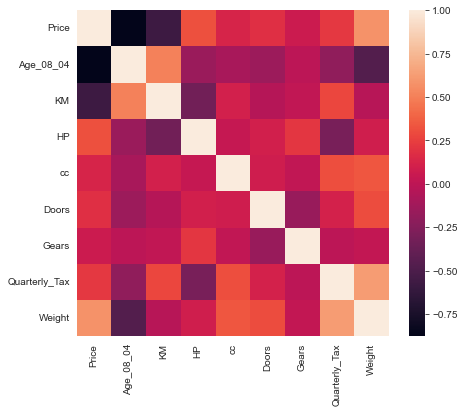

In [82]:
# plotting heatmap
plt.figure(figsize=(7,6))
sns.heatmap(toyota.corr())

# Building model

In [84]:
#Building first_model
import statsmodels.formula.api as smf
first_model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota).fit()

In [85]:
#summary of 1st model
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Fri, 13 Jan 2023   Prob (F-statistic):               0.00
Time:                        17:21:08   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
# 1st model's rsquare and adj. rsquare
(first_model.rsquared,first_model.rsquared_adj)

(0.8637627463428191, 0.8629989775766962)

In [87]:
# first model residual
first_model.resid

0      -3312.580505
1      -2522.355186
2      -2850.732460
3      -1476.496731
4      -2472.419010
           ...     
1431   -1293.758297
1432    2553.661579
1433      45.701993
1434   -1328.038121
1435   -3452.438333
Length: 1436, dtype: float64

# Checking Collinearity by VIF

In [110]:
# calculating vif for all features
rsq_Age = smf.ols("Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=toyota).fit().rsquared  
vif_Age = 1/(1-rsq_Age)
rsq_Km = smf.ols("KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=toyota).fit().rsquared  
vif_Km = 1/(1-rsq_Km) 
rsq_Hp = smf.ols("HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight",data=toyota).fit().rsquared  
vif_Hp = 1/(1-rsq_Hp) 
rsq_Cc = smf.ols("cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight",data=toyota).fit().rsquared  
vif_Cc = 1/(1-rsq_Cc)
rsq_Doors = smf.ols("Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight",data=toyota).fit().rsquared  
vif_Doors = 1/(1-rsq_Doors) 
rsq_Gears = smf.ols("Gears~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight",data=toyota).fit().rsquared  
vif_Gears = 1/(1-rsq_Gears) 
rsq_Qt = smf.ols("Quarterly_Tax~Age_08_04+KM+HP+cc+Doors+Gears+Weight",data=toyota).fit().rsquared  
vif_Qt = 1/(1-rsq_Qt)
rsq_weight = smf.ols("Weight~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax",data=toyota).fit().rsquared  
vif_weight = 1/(1-rsq_weight) 


# Storing vif values in a data frame
data = {'Variables':['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],'VIF':[vif_Age,vif_Km,vif_Hp,vif_Cc,vif_Doors,vif_Gears,vif_Qt,vif_weight]}
Vif_frame = pd.DataFrame(data)  
Vif_frame

,Variables,VIF
0,Age_08_04,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Quarterly_Tax,2.311431
7,Weight,2.516420


# Q-Q plot for Residual Analysis 

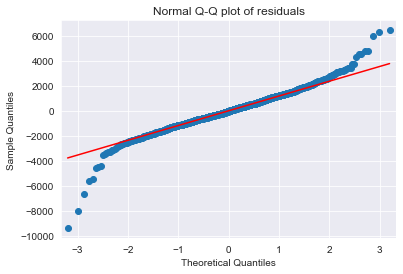

In [89]:
# Plotting Q-Q plot
import statsmodels.api as sm
qqplot=sm.qqplot(first_model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

# Residual plot for Homoscedasticity

In [90]:
# making function to get std values
def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std()

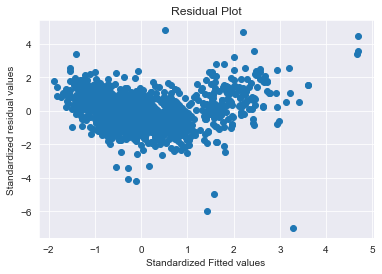

In [91]:
# Plotting residual plot
plt.scatter(get_standardized_values(first_model.fittedvalues),
            get_standardized_values(first_model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual vs Regressors

eval_env: 1


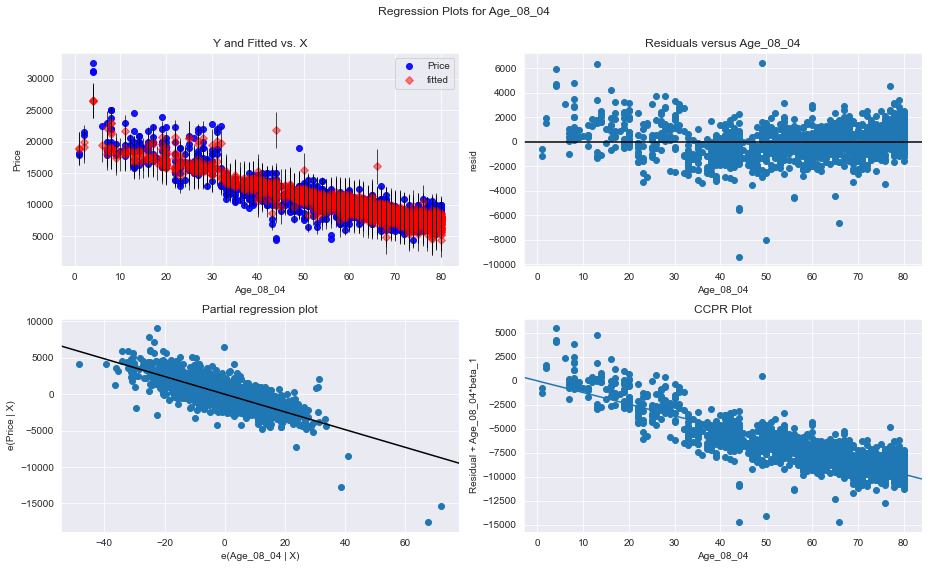

In [92]:
# Plotting for AGE_08_04
fig = plt.figure(figsize=(13,8))
fig = sm.graphics.plot_regress_exog(first_model,"Age_08_04", fig=fig)
plt.show()

eval_env: 1


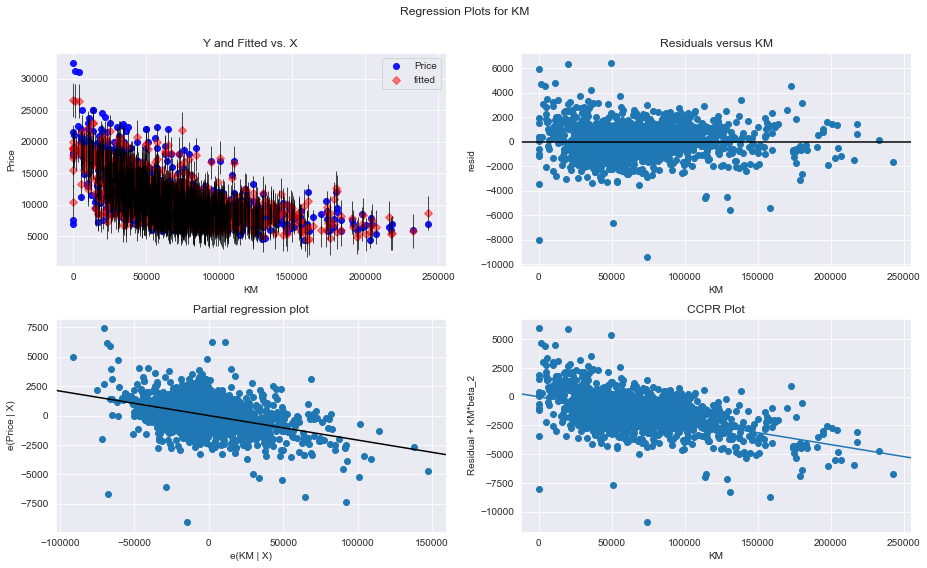

In [93]:
# Plotting regression plot for KM
fig = plt.figure(figsize=(13,8))
fig = sm.graphics.plot_regress_exog(first_model,"KM", fig=fig)
plt.show()

eval_env: 1


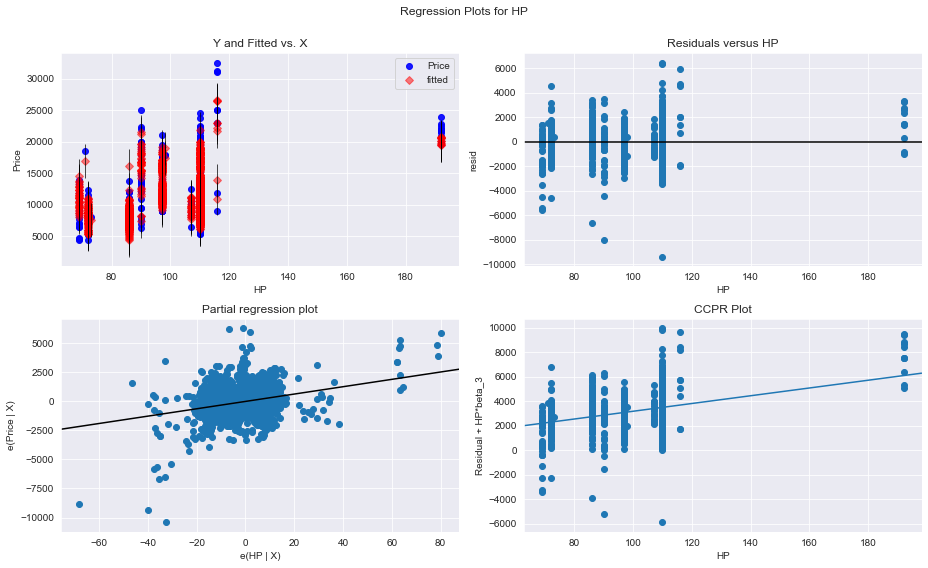

In [94]:
# Plotting regression plot for HP
fig = plt.figure(figsize=(13,8))
fig = sm.graphics.plot_regress_exog(first_model,"HP", fig=fig)
plt.show()

eval_env: 1


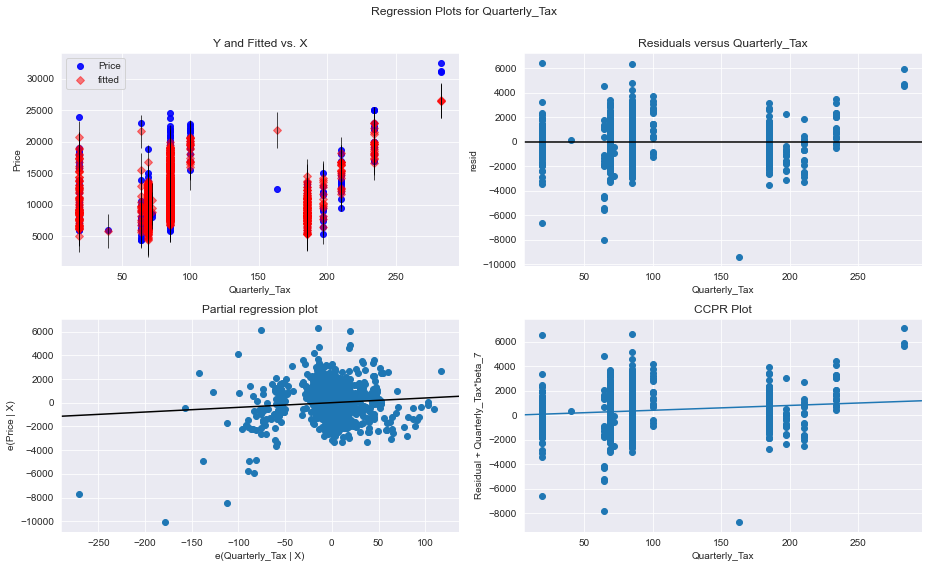

In [95]:
# Plotting regression plot for Quarterly_Tax
fig = plt.figure(figsize=(13,8))
fig = sm.graphics.plot_regress_exog(first_model,"Quarterly_Tax", fig=fig)
plt.show()

eval_env: 1


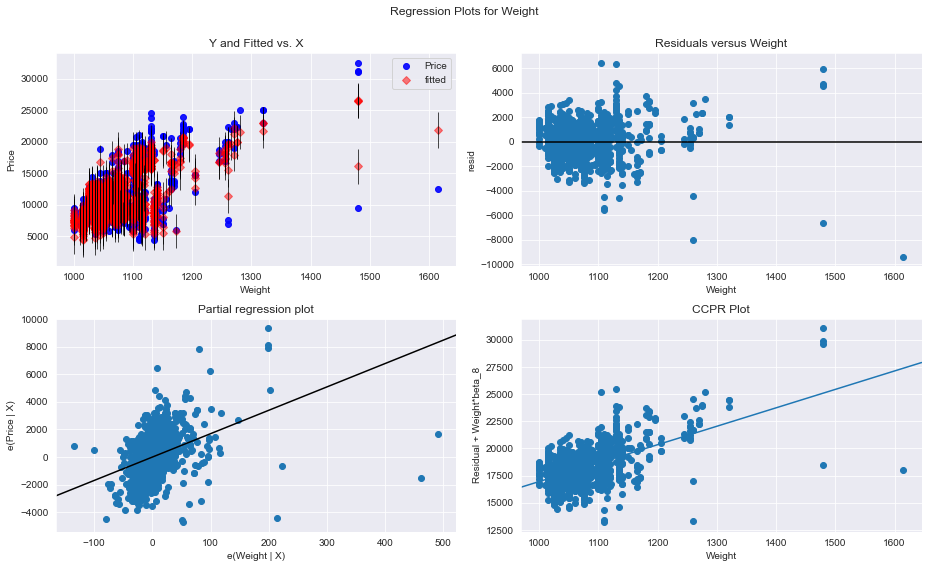

In [96]:
# Plotting regression plot for Weight 
fig = plt.figure(figsize=(13,8))
fig = sm.graphics.plot_regress_exog(first_model,"Weight", fig=fig)
plt.show()

# Model Deletion Diagnostics

Detecting outliers and influencers

In [97]:
# Calculating cooks distance
model_influence=first_model.get_influence()
(c,_)=model_influence.cooks_distance
c

array([7.23682667e-03, 3.96793393e-03, 5.46476784e-03, ...,
       8.44762355e-07, 6.97878368e-04, 1.08627724e-02])

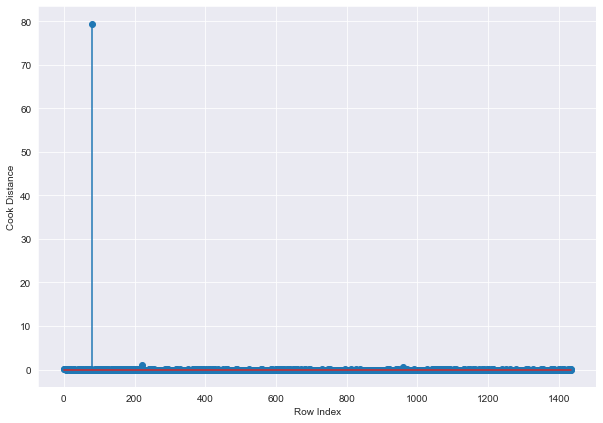

In [98]:
# plotting stem graph for outliers
fig=plt.figure(figsize=(10,7))
plt.stem(np.arange(len(toyota)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cook Distance')
plt.show()

In [99]:
(np.argmax(c),np.max(c))

(80, 79.52010624139507)

In [100]:
np.where(c>0.2)

(array([ 80, 221, 960], dtype=int64),)

Above pt. contains outlier

Lets try to improve model by deleting this pts.

# Improving model

In [101]:
# Deleting outliers
toyota1=toyota.drop(toyota.index[[80,221,960]],axis=0).reset_index(drop=True)
toyota1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


# Building final model

In [102]:
final_model = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=toyota1).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1372.
Date:                Fri, 13 Jan 2023   Prob (F-statistic):               0.00
Time:                        17:21:23   Log-Likelihood:                -12226.
No. Observations:                1433   AIC:                         2.447e+04
Df Residuals:                    1424   BIC:                         2.452e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.474e+04   1432.942    -10.289      0.000   -1.76e+04   -1.19e+04
Age_08_04      -112.0180      2.479    -45.185      0.000    -116.881    -107.155
KM               -0.0170      0.001    -14.160      0.000      -0.019      -0.015
HP               36.6084      2.745     13.334      0.000      31.223      41.994
cc               -3.7954      0.302    -12.562      0.000      -4.388      -3.203
Doors          -122.5437     37.480     -3.270      0.001    -196.067     -49.021
Gears           464.9839    180.976      2.569      0.010     109.975     819.993
Quarterly_Tax     5.2134      1.371      3.802      0.000       2.523       7.904
Weight           30.6398      1.290     23.748      0.000      28.109      33.171
==============================================================================
Omnibus:                      121.821   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              704.567
Skew:                          -0.082   Prob(JB):                    1.01e-153
Kurtosis:                       6.431   Cond. No.                     3.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Table of R_sq of first and final model

In [103]:
data1 = {"Models":['First Model','Final Model'],"R Squared":[first_model.rsquared,final_model.rsquared]}
table=pd.DataFrame(data1)
print(table)

        Models  R Squared
0  First Model   0.863763
1  Final Model   0.885185


# Model Prediction

In [107]:
data3 = toyota.drop(['Price'],axis=1,inplace=True)
data3

In [109]:
final_model.predict(data3)

array([16333.27381415, 15892.32685024, 16310.88608064, ...,
        8644.94730242,  8758.66446182, 10641.52100191])

Here, we hvae got final model with best R_sq value